In [160]:
import numpy as np
import pandas as pd

In [161]:
df = pd.read_csv('SMSSpamCollection.tsv',sep='\t')

In [162]:
df.head()

,label,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [163]:
df['length'] = df['message'].apply(len)

In [164]:
df.head()

,label,message,length
0,ham,I've been searching for the right words to tha...,196
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,"Nah I don't think he goes to usf, he lives aro...",61
3,ham,Even my brother is not like to speak with me. ...,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35


In [165]:
df.isnull().sum()

label      0
message    0
length     0
dtype: int64

In [166]:
len(df)

5568

In [167]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [168]:
df['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

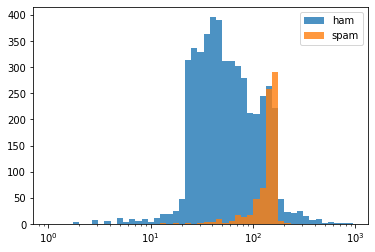

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
# x is length
X = df['length']
# y is label
y = df['label']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [171]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3730,) (3730,) (1838,) (1838,)


In [178]:
x_train= x_train.values.reshape(-1, 1)
x_test= x_test.values.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# y_test= y_test.reshape(-1, 1)

In [179]:
print(x_train,x_test)

[[163]
 [ 24]
 [ 28]
 ...
 [ 29]
 [ 41]
 [ 73]] [[159]
 [ 51]
 [ 44]
 ...
 [ 53]
 [ 56]
 [143]]


In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
lr_model = LogisticRegression(solver='lbfgs')

In [182]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [183]:
from sklearn import metrics

In [184]:
pred = lr_model.predict(x_test)

In [185]:
print(pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [187]:
y_test

1168    spam
765      ham
465      ham
1117     ham
5371     ham
        ... 
4940     ham
4803     ham
3650     ham
14       ham
4755    spam
Name: label, Length: 1838, dtype: object

In [188]:
metrics.confusion_matrix(y_test,pred)

array([[1571,   37],
       [ 229,    1]], dtype=int64)

In [189]:
pd.DataFrame(metrics.confusion_matrix(y_test,pred),index=['ham','spam'],columns=['ham','spam'])

,ham,spam
ham,1571,37
spam,229,1


In [190]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92      1608
        spam       0.03      0.00      0.01       230

    accuracy                           0.86      1838
   macro avg       0.45      0.49      0.46      1838
weighted avg       0.77      0.86      0.81      1838



In [191]:
print(metrics.accuracy_score(y_test,pred))

0.8552774755168662


In [192]:
from sklearn.naive_bayes import MultinomialNB

In [193]:
nb_model = MultinomialNB()

In [194]:
nb_model.fit(x_train,y_train)

MultinomialNB()

In [195]:
predic = nb_model.predict(x_test)

In [196]:
print(metrics.confusion_matrix(y_test,predic))

[[1608    0]
 [ 230    0]]


In [204]:
print(metrics.classification_report(y_test,predic))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1608
        spam       0.00      0.00      0.00       230

    accuracy                           0.87      1838
   macro avg       0.44      0.50      0.47      1838
weighted avg       0.77      0.87      0.82      1838



c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [205]:
print(metrics.accuracy_score(y_test,predic))

0.8748639825897715


In [202]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
predcts = svc_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predcts))

[[1463  145]
 [  87  143]]


In [203]:
print(metrics.classification_report(y_test,predcts))

              precision    recall  f1-score   support

         ham       0.94      0.91      0.93      1608
        spam       0.50      0.62      0.55       230

    accuracy                           0.87      1838
   macro avg       0.72      0.77      0.74      1838
weighted avg       0.89      0.87      0.88      1838



In [206]:
print(metrics.accuracy_score(y_test,predcts))

0.8737758433079434
